## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Resizing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Input, Dropout, Activation
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Reshape, Cropping2D, LeakyReLU, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

## Get images from dataset

In [2]:
root_path = '/kaggle/input/medical-image-dataset/Dataset'

In [3]:
root_path

'/kaggle/input/medical-image-dataset/Dataset'

In [4]:
image_paths = os.listdir(root_path)
len(image_paths)

120

In [5]:
image_paths

['45.jpg',
 '56.jpg',
 '89.jpg',
 '20.jpg',
 '58.jpg',
 '6.jpg',
 '109.jpg',
 '76.jpg',
 '71.jpg',
 '115.jpg',
 '5.jpg',
 '8.jpg',
 '84.jpg',
 '85.jpg',
 '67.jpg',
 '118.jpg',
 '82.jpg',
 '30.jpg',
 '97.jpg',
 '106.jpg',
 '113.jpg',
 '38.jpg',
 '42.jpg',
 '33.jpg',
 '10.jpg',
 '54.jpg',
 '62.jpg',
 '120.jpg',
 '35.jpg',
 '61.jpg',
 '59.jpg',
 '73.jpg',
 '98.jpg',
 '41.jpg',
 '94.jpg',
 '60.jpg',
 '57.jpg',
 '112.jpg',
 '91.jpg',
 '9.jpg',
 '101.jpg',
 '99.jpg',
 '37.jpg',
 '1.jpg',
 '69.jpg',
 '75.jpg',
 '117.jpg',
 '81.jpg',
 '46.jpg',
 '44.jpg',
 '65.jpg',
 '50.jpg',
 '29.jpg',
 '79.jpg',
 '105.jpg',
 '16.jpg',
 '111.jpg',
 '55.jpg',
 '23.jpg',
 '7.jpg',
 '77.jpg',
 '80.jpg',
 '28.jpg',
 '22.jpg',
 '103.jpg',
 '40.jpg',
 '48.jpg',
 '104.jpg',
 '24.jpg',
 '88.jpg',
 '64.jpg',
 '31.jpg',
 '114.jpg',
 '43.jpg',
 '100.jpg',
 '13.jpg',
 '74.jpg',
 '68.jpg',
 '53.jpg',
 '83.jpg',
 '107.jpg',
 '72.jpg',
 '32.jpg',
 '102.jpg',
 '17.jpg',
 '26.jpg',
 '39.jpg',
 '86.jpg',
 '15.jpg',
 '119.jpg'

In [6]:
temp_img = load_img(root_path + '/' + image_paths[10])
w, h = temp_img.size

print(w, h)
print(w/4.0, h/4.0)

748 512
187.0 128.0


In [7]:
images = []
image_size = (int(h/4), int(w/4))

for image_path in image_paths:
    img = load_img(root_path + '/' + image_path, target_size=image_size, color_mode="grayscale")
    img = img_to_array(img)
    images.append(img)

In [8]:
len(img)
len(img[0])
img.shape

len(images)

images[0]

len(images[0])

images[0][0]

array([[255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [255.],
       [200.],
       [ 44.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  2.],
       [  2.],
       [  3.],
       [  4.],
       [  4.],
       [  5.],
       [  5.],
       [  4.],
       [  0.],
       [  0.],
       [  8.],
       [  8.],
       [  8.],
       [ 10.],
       [  9.],
       [  

In [9]:
images_paragen = np.array(images)

In [10]:
images = np.array(images) / 255.0

In [11]:
type(images)
images.shape

(120, 128, 187, 1)

## Visualization

In [12]:
def visualize_df(df: np.ndarray):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i, ax in enumerate(axes.ravel()):
        if i < len(df):
            img = df[i]
            ax.imshow(img, cmap="gray")
            ax.axis("off")
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

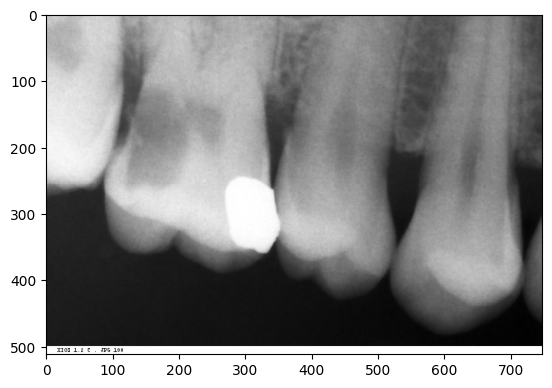

In [13]:
plt.imshow(temp_img)

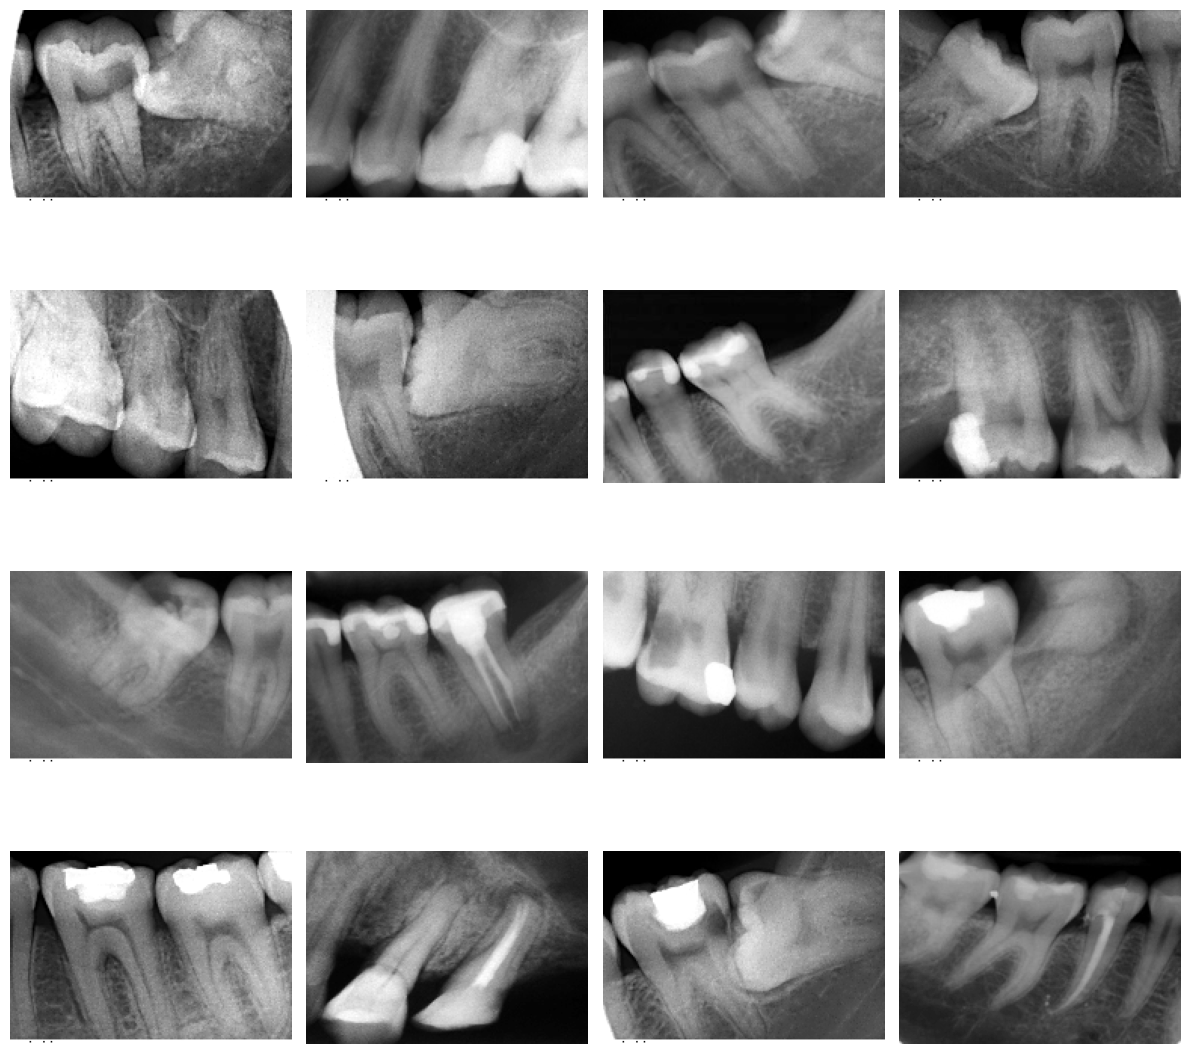

In [14]:
visualize_df(images)

In [15]:
images.shape

(120, 128, 187, 1)

## Add noise

In [16]:
def add_noise(images):
    noisy_images = []
    noise_factor = 0.25
    for img in images:
        mean = 0
        var = 1
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, img.shape)
        # gauss_normalized = (gauss - np.min(gauss)) / (np.max(gauss) - np.min(gauss))
        noisy_img = img + noise_factor * gauss
        noisy_images.append(np.clip(noisy_img, 0., 1.))
    return np.array(noisy_images)

In [17]:
noisy_images = add_noise(images)

In [18]:
noisy_images[0]
noisy_images.shape

(120, 128, 187, 1)

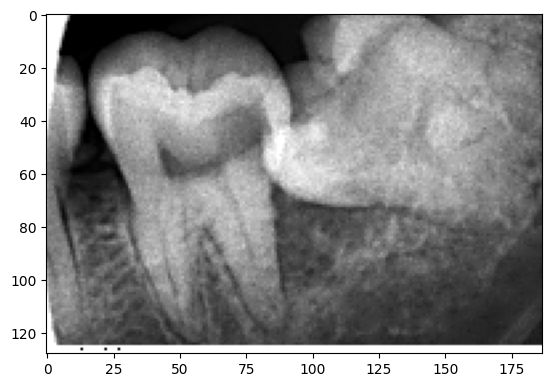

In [19]:
plt.imshow(images[0], cmap = 'gray')

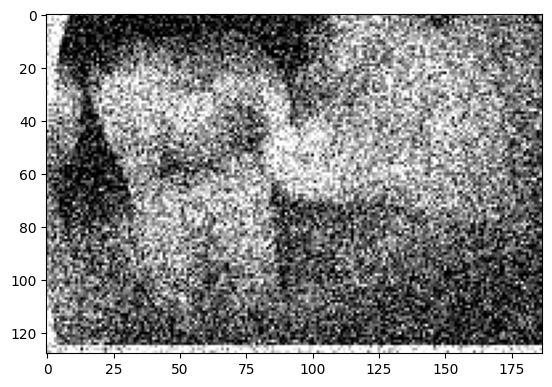

In [20]:
plt.imshow(noisy_images[0], cmap = 'gray')

## train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(noisy_images, images, test_size=0.2, random_state=42)

In [22]:
noisy_images.shape
images.shape

(120, 128, 187, 1)

In [23]:
noisy_images.shape[1:]

(128, 187, 1)

## Denoising

## Autoencoder

In [24]:
# Input shape
input_shape = noisy_images.shape[1:]

# Encoder
input_img = Input(shape=input_shape, name='input_layer')
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Latent space
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
latent = MaxPooling2D((2, 2), padding='same', name='latent_space')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(latent)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Output
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='output_layer')(x)

# Resize to match input dimensions
resized_output = Resizing(height=input_shape[0], width=input_shape[1], name='resized_output')(decoded)

In [25]:
autoencoder = Model(input_img, resized_output)
autoencoder.compile(optimizer='adam', loss='mse')

In [26]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 187, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 187, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 94, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 94, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (MaxPooling2D)     │ (None, 16, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 48, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 64, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 96, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 128, 192, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Conv2D)           │ (None, 128, 192, 1)    │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resized_output (Resizing)       │ (None, 128, 187, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=10,           # Stop after 10 epochs with no improvement
    # min_delta=0.0002,
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [28]:
history = autoencoder.fit(
    X_train, y_train,
    epochs=50,  # Adjust as needed
    batch_size=8,  # Adjust as needed
    validation_data=(X_test, y_test),  # Use the test split for validation
    shuffle=True,
    callbacks=[early_stopping]  # Include Early Stopping
)

Epoch 1/50


I0000 00:00:1732768825.442250      82 service.cc:145] XLA service 0x7a0d94007130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732768825.442305      82 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732768825.442309      82 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0544

I0000 00:00:1732768830.664715      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0522 - val_loss: 0.0247
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0215 - val_loss: 0.0157
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - val_loss: 0.0096
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039 - val_loss: 0.0105
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - val_l

In [29]:
# Predict on the test set
y_pred1 = autoencoder.predict(X_test)

# Flatten predictions and true values to compute MSE
mse1 = mean_squared_error(y_test.flatten(), y_pred1.flatten())

print("Mean Squared Error (MSE) on test set:", mse1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Mean Squared Error (MSE) on test set: 0.0026591758


In [30]:
# # Flatten the images for comparison
# target_images_flat = y_test.reshape(len(y_test), -1)
# predicted_images_flat = denoised_images.reshape(len(denoised_images), -1)

# # Compute MSE
# mse = mean_squared_error(target_images_flat, predicted_images_flat)
# print(f"Mean Squared Error: {mse}")

NameError: name 'denoised_images' is not defined

# CNN

In [31]:
# Define the CNN model
cnn_model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), padding='same', input_shape=noisy_images.shape[1:]),
    BatchNormalization(),
    Activation('relu'),
    
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    
    # Output layer: Reduce back to one channel
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

In [33]:
# Model summary
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 187, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 187, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 187, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 187, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 187, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 187, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 187, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 187, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128, 187, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 187, 1)    │         1,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,721 (370.00 KB)

 Trainable params: 94,273 (368.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [35]:
# Training with train-test split
history = cnn_model.fit(
    X_train, y_train,  # Training data
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),  # Validation data
    shuffle=True,
    callbacks=[early_stopping]    # Early stopping to avoid overfitting
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0495 - val_loss: 0.0489
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0129 - val_loss: 0.0507
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0077 - val_loss: 0.0495
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0071 - val_loss: 0.0510
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0055 - val_loss: 0.0527
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0048 - val_loss: 0.0478
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0050 - val_loss: 0.0530
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0047 - val_loss: 0.0534
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0043 - val_loss: 0.0547
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0044 - val_loss: 0.0549
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0041 - val_loss: 0.0511


In [36]:
# Predict on the test set
y_pred2 = cnn_model.predict(X_test)

# Flatten predictions and true values to compute MSE
mse2 = mean_squared_error(y_test.flatten(), y_pred2.flatten())

print("Mean Squared Error (MSE) on test set:", mse2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Mean Squared Error (MSE) on test set: 0.04782119


## UNet

In [37]:
input_shape = noisy_images.shape[1:]
inputs = Input(input_shape)

# Encoder
c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

# Bottleneck
c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

# Decoder
u4 = UpSampling2D((2, 2))(c3)

u4_resized = Resizing(height=u4.shape[1], width=u4.shape[2], name='resized_c2')(c2)
u4 = concatenate([u4, u4_resized])
c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same')(c4)

u5 = UpSampling2D((2, 2))(c4)
u5_resized = Resizing(height=u5.shape[1], width=u5.shape[2], name='resized_c1')(c1)
u5 = concatenate([u5, u5_resized])
c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(u5)
c5 = Conv2D(32, (3, 3), activation='relu', padding='same')(c5)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
outputs_resized = Resizing(height=input_shape[0], width=input_shape[1])(outputs)

In [38]:
# Compile the model
unet_model = Model(inputs, outputs_resized)
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

In [39]:
unet_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 187,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 128, 187,  │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 128, 187,  │      9,248 │ conv2d_10[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 93,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 64, 93,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 64, 93,    │     36,928 │ conv2d_12[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 46,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 32, 46,    │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 46,    │    147,584 │ conv2d_14[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 64, 92,    │          0 │ conv2d_15[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resized_c2          │ (None, 64, 92,    │          0 │ conv2d_13[0][0]   │
│ (Resizing)          │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 92,    │          0 │ up_sampling2d_3[… │
│ (Concatenate)       │ 192)              │            │ resized_c2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 64, 92,    │    110,656 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 64, 92,    │     36,928 │ conv2d_16[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 128, 184,  │          0 │ conv2d_17[0][0]   │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resized_c1          │ (None, 128, 184,  │          0 │ conv2d_11[0][0]   │
│ (Resizing)          │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 184,  │          0 │ up_sampling2d_4[

 Total params: 470,977 (1.80 MB)

 Trainable params: 470,977 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Early stopping
early_stopping = EarlyStopping(
    # min_delta=0.0002,
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [41]:
# Train the model
history = unet_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    shuffle=True,
    callbacks=[early_stopping]    # Early stopping to avoid overfitting
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - loss: 0.6775 - mse: 0.0543 - val_loss: 0.6259 - val_mse: 0.0252
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.6001 - mse: 0.0185 - val_loss: 0.5888 - val_mse: 0.0107
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5785 - mse: 0.0085 - val_loss: 0.5732 - val_mse: 0.0056
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5753 - mse: 0.0049 - val_loss: 0.5683 - val_mse: 0.0041
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5681 - mse: 0.0041 - val_loss: 0.5665 - val_mse: 0.0035
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5543 - mse: 0.0034 - val_loss: 0.5657 - val_mse: 0.0034
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5645 - mse: 0.0032 - val_loss: 0.5645 - val_mse: 0.0030
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.5565 - mse: 0.0032 - val_loss: 0.5646 - val_mse: 0.0030
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5

In [42]:
# Predict on the test set
y_pred3 = unet_model.predict(X_test)

# Flatten predictions and true values to compute MSE
mse3 = mean_squared_error(y_test.flatten(), y_pred3.flatten())

print("Mean Squared Error (MSE) on test set:", mse3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Mean Squared Error (MSE) on test set: 0.0017877073


## Comparing performances

In [43]:
print(f"Autoencoder model MSE: {mse1:.6f}")
print(f"CNN model MSE: {mse2:.6f}")
print(f"UNet model MSE: {mse3:.6f}")

best_mse = min(mse1, mse2, mse3)

if best_mse == mse1:
    best_model = "Autoencoder"
elif best_mse == mse2:
    best_model = "CNN"
else:
    best_model = "UNet"

# Print the best model based on MSE
print(f"The best performing model is {best_model} with MSE: {best_mse:.6f}")

Autoencoder model MSE: 0.002659
CNN model MSE: 0.047821
UNet model MSE: 0.001788
The best performing model is UNet with MSE: 0.001788


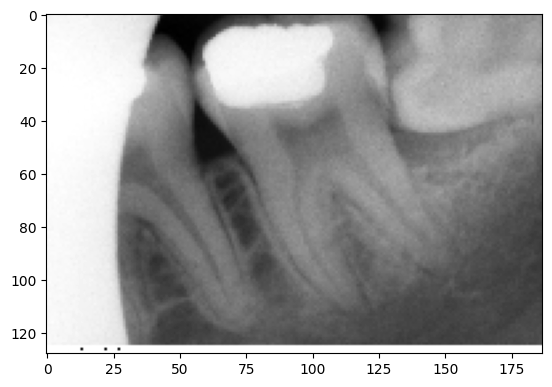

In [44]:
plt.imshow(y_test[0], cmap='gray')

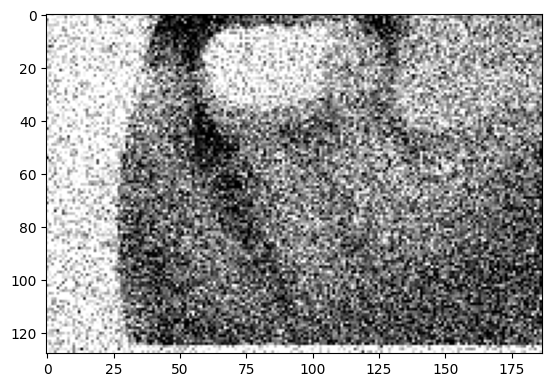

In [45]:
plt.imshow(X_test[0], cmap='gray')

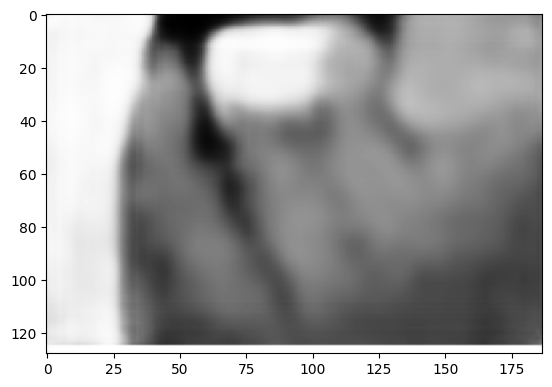

In [46]:
plt.imshow(y_pred1[0], cmap='gray')

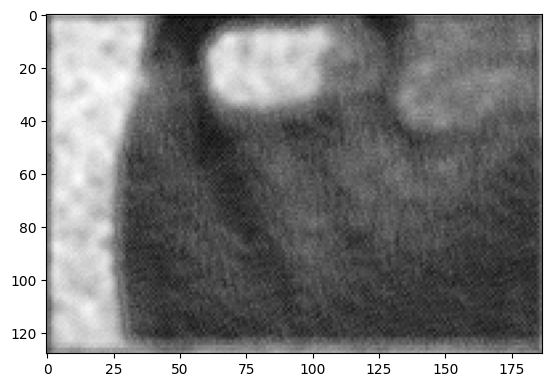

In [47]:
plt.imshow(y_pred2[0], cmap='gray')

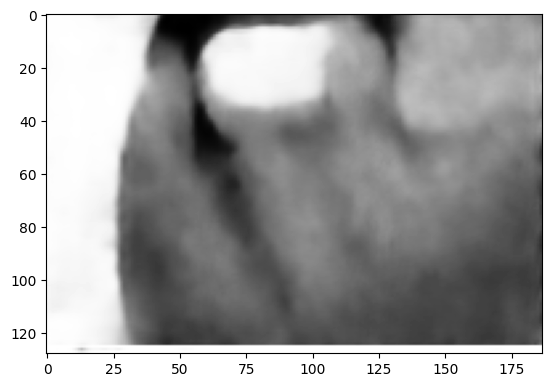

In [48]:
plt.imshow(y_pred3[0], cmap='gray')

## Generation

In [49]:
# Define the directory where you want to save the images
save_dir = '/kaggle/working/generated_images'
temp_dir = '/kaggle/working/temp_images'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
os.makedirs(temp_dir, exist_ok=True)

In [ ]:
# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 187
IMG_SIZE = IMG_HEIGHT * IMG_WIDTH  # Total pixels
LATENT_DIM = 100

# Step 1: Define a custom PyTorch Dataset
class CustomImageDataset(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Normalize to range [-1, 1] for GAN training
        img = self.images[idx] / 127.5 - 1.0
        return torch.tensor(img, dtype=torch.float32).squeeze(-1)  # Remove last dimension

# Step 2: Define Generator and Discriminator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, IMG_SIZE),  # Output size matches image dimensions
            nn.Tanh()  # Output range [-1, 1]
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(img.size(0), 1, IMG_HEIGHT, IMG_WIDTH)  # Reshape to grayscale image

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(IMG_SIZE, 512),  # Input size matches image dimensions
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output: probability (real or fake)
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)  # Flatten the image
        validity = self.model(img_flat)
        return validity

# Step 3: Training setup
def train_gan(images, epochs=3000, batch_size=32, latent_dim=LATENT_DIM, save_interval=500):
    # Prepare data loader
    dataset = CustomImageDataset(images)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize Generator and Discriminator
    generator = Generator(latent_dim).cuda()
    discriminator = Discriminator().cuda()

    # Loss and optimizers
    adversarial_loss = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

    # Training loop
    for epoch in range(epochs):
        for real_imgs in dataloader:
            real_imgs = real_imgs.cuda()

            # Train Discriminator
            valid = torch.ones(real_imgs.size(0), 1).cuda()  # Label 1
            fake = torch.zeros(real_imgs.size(0), 1).cuda()  # Label 0
            z = torch.randn(real_imgs.size(0), latent_dim).cuda()  # Random noise
            gen_imgs = generator(z)

            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_imgs), valid)
            fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            g_loss = adversarial_loss(discriminator(gen_imgs), valid)
            g_loss.backward()
            optimizer_G.step()

        # Log progress and save images
        if epoch % save_interval == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}/{epochs} - D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
            with torch.no_grad():
                z = torch.randn(16, latent_dim).cuda()
                generated_imgs = generator(z).cpu().numpy()
                save_generated_images(generated_imgs, epoch, temp_dir)

    return generator

# Step 4: Save and visualize generated images
def save_generated_images(images, epoch, save_dir):
    images = (images + 1) * 127.5  # Rescale to [0, 255]
    images = images.astype(np.uint8)
    rows, cols = 4, 4
    fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
    count = 0
    for i in range(rows):
        for j in range(cols):
            axs[i, j].imshow(images[count, 0], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.tight_layout()
    plt.savefig(f"{save_dir}/generated_epoch_{epoch}.png")
    # plt.savefig(f"generated_epoch_{epoch}.png")
    plt.show()

# Step 5: Load your images and run training
generator = train_gan(images_paragen)

# Step 6: Generate new images after training
def generate_images(generator, latent_dim, num_images=16, dir=temp_dir):
    generator.eval()
    z = torch.randn(num_images, latent_dim).cuda()
    with torch.no_grad():
        gen_imgs = generator(z).cpu().numpy()
    save_generated_images(gen_imgs, "final")

generate_images(generator, latent_dim=LATENT_DIM, temp_dir)


In [ ]:
generate_images(generator, latent_dim=LATENT_DIM, 120, save_dir)

In [ ]:
# Define the Generator

generator = Sequential()
generator.add(Dense(256, input_dim=100))  # Noise input (100-dim)
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128*187*1, activation='tanh'))  # Output shape (128, 187, 3)
generator.add(Reshape((128, 187, 1)))

# generator = Sequential()
# generator.add(Dense(128 * 32 * 47, input_dim=100))  # Adjust size to match target
# generator.add(LeakyReLU(0.2))
# generator.add(BatchNormalization(momentum=0.8))
# generator.add(Reshape((32, 47, 128)))  # Reshape to smaller dimensions
# generator.add(Conv2DTranspose(64, kernel_size=4, strides=(2, 2), padding='same'))
# generator.add(LeakyReLU(0.2))
# generator.add(BatchNormalization(momentum=0.8))
# generator.add(Conv2DTranspose(1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='tanh'))
# generator.add(Cropping2D(((0, 0), (0, 1))))

# Define the Discriminator

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(128, 187, 1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))  # Output (real/fake probability)

# discriminator = Sequential()
# discriminator.add(Conv2D(32, kernel_size=3, strides=2, padding='same', input_shape=(128, 187, 1)))
# discriminator.add(LeakyReLU(0.2))
# discriminator.add(Dropout(0.25))
# discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding='same'))
# discriminator.add(LeakyReLU(0.2))
# discriminator.add(Dropout(0.25))
# discriminator.add(Flatten())
# discriminator.add(Dense(1, activation='sigmoid'))

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False  # Freeze the discriminator when training the GAN

gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [ ]:
def save_generated_images(epoch, generator, image_shape=(128, 187, 3), save_dir='./generated_images'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    noise = np.random.normal(0, 1, (25, 100))  # Generate 25 new images
    generated_images = generator.predict(noise)

    # Rescale images to [0, 255] if using a [-1, 1] scale
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    
    # Plot and save the generated images
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))
    count = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(generated_images[count])
            axs[i, j].axis('off')
            count += 1
    fig.savefig(f"{save_dir}/generated_epoch_{epoch}.png")
    plt.close()

In [ ]:
epochs=1000
batch_size=32
half_batch = batch_size // 2

images_norm = (images_paragen / 127.5) - 1
for epoch in range(epochs):
    # Select random half batch of real images
    idx = np.random.randint(0, images_norm.shape[0], half_batch)
    real_images = images_norm[idx]
        
    # Generate fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)
        
    # Train the discriminator (real classified as 1, fake classified as 0)
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
    # Train the generator (trying to fool the discriminator)
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # Labels for fake as real
    
    # Print progress and save generated images at intervals
    if epoch % 100 == 0:  # Save images every 100 epochs
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")
        save_generated_images(epoch, generator)
 

In [ ]:
save_dir = '/kaggle/working/generated_images2'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Generate and save 25 new images after training the GAN
noise = np.random.normal(0, 1, (25, 100))  # Generate 25 random noise samples
generated_images = generator.predict(noise)

for i, img in enumerate(generated_images):
    img = (img * 127.5 + 127.5).astype(np.uint8)  # Rescale image from [-1,1] to [0,255]
    plt.imsave(os.path.join(save_dir, f'generated_img_{i}.png'), img.squeeze(), cmap='gray')  # Save as grayscale image


In [ ]:
generated_path = '/kaggle/working/generated_images2/'
generated_images = os.listdir(generated_path)

In [ ]:
gen_img = load_img(generated_path + generated_images[10])
plt.imshow(gen_img)

In [ ]:
! rm -r /kaggle/working/generated_images
! rm -r /kaggle/working/generated_images2
! rm /kaggle/working/*